In [1]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import pandas as pd
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib import cm
from matplotlib import colors
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from Eco_function.eco_plot import *
import pickle
import matplotlib.gridspec as gridspec
tableau20=color20() # initial colors for plot;
sns.set(style="white")
from scipy.integrate import quad,quadrature
from scipy.stats import truncnorm
from scipy.stats import norm
fontsize=16
def integrmomentum1(x, a):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)*(x+a)
def integrmomentum2(x, a):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)*(x+a)**2

# Fig1: Dynamics

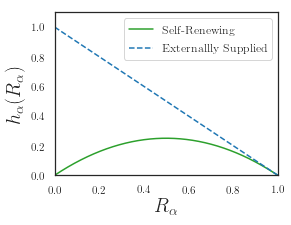

In [4]:
f, ax1 = plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fontsize=20
def fun(gamma,R):
    return R**gamma/(R**gamma+1.0)
R=np.linspace(0,1,1000)

ax1.plot(R,R*(1-R), label= 'Self-Renewing',c=tableau20[4])
ax1.plot(R,(1-R), label= 'Externallly Supplied',c=tableau20[0],linestyle='dashed')

#plt.plot(R, 1.0*np.ones(len(R)), label= 'constant',c=tableau20[4])
ax1.set_xlabel(r'$\displaystyle R_\alpha$',fontsize=fontsize)    
ax1.set_ylabel(r'$\displaystyle h_\alpha(R_\alpha)$',fontsize=fontsize) 
ax1.set_xlim(left=0)
ax1.set_xlim(right=1.0)
ax1.set_ylim(bottom=0)
ax1.set_ylim(top=1.1)
ax1.legend(fontsize=12)
f.set_size_inches(4, 3)
f.savefig('Supply.pdf', dpi=300, bbox_inches='tight',transparent=True)

# Fig2: Simulations
## Gaussian

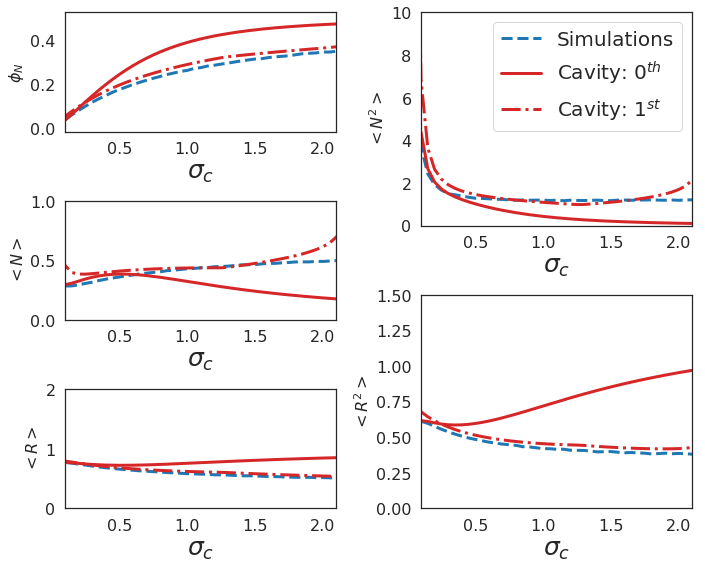

In [2]:
k=1.
file_name='Data/Community_gaussian_null_linear_CVXOPT_log_sigc.csv'
data0=pd.read_csv(file_name)
data0=data0[data0['K']==k]

file_name='Data/Cavity_linear_gaussian.csv'
data1=pd.read_csv(file_name)
data1=data1[data1['K']==k]

file_name='Data/Cavity_linear_1st_gaussian.csv'
data2=pd.read_csv(file_name)
data2=data2[data2['K']==k]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(nrows=6, ncols=2)
fontsize=25
ax11 = fig.add_subplot(gs[:2, 0])
ax21 = fig.add_subplot(gs[2:4, 0])
ax31 = fig.add_subplot(gs[4:, 0])
ax12 = fig.add_subplot(gs[:3, 1])
ax22 = fig.add_subplot(gs[3:, 1])
axs=[ax11 ,ax21,ax31,ax12, ax22]
Y1=['phi_N', 'mean_N', 'mean_R', 'q_N', 'q_R']
Y2=['phiN', 'N', 'R', 'qN', 'qR']
Labels=[r'$\phi_N$', '$<N>$', '$<R>$',r'$<N^2>$',r'$<R^2>$']
for i in range(5):
    ax=axs[i]
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.plot(data0['epsilon'], data0[Y1[i]],label='Simulations',linestyle='--',linewidth=3,c=tableau20[0])
    ax.plot(data1['Sigc'], data1[Y2[i]],linestyle='-',label='Cavity: $0^{th}$',linewidth=3,c=tableau20[6])
    ax.plot(data2['Sigc'], data2[Y2[i]],linestyle='-.',label='Cavity: $1^{st}$',linewidth=3,c=tableau20[6])
    ax.set_xlabel(r'$\sigma_c$',fontsize=fontsize)
    ax.set_ylabel(Labels[i],fontsize=16)
    ax.set_xlim(0.1,2.1)
    if i==1: ax.set_ylim(0.,1)
    if i==2: ax.set_ylim(0.,2)
    if i==4: ax.set_ylim(0.,1.5)
    if i==3:
        ax.set_ylim(0.,10)
        ax.legend(fontsize=20,loc='upper right')
fig.tight_layout()
fig_name='Cavity_simulations.pdf'
fig.savefig(fig_name, dpi=300,bbox_inches='tight',transparent='True')

## Uniform

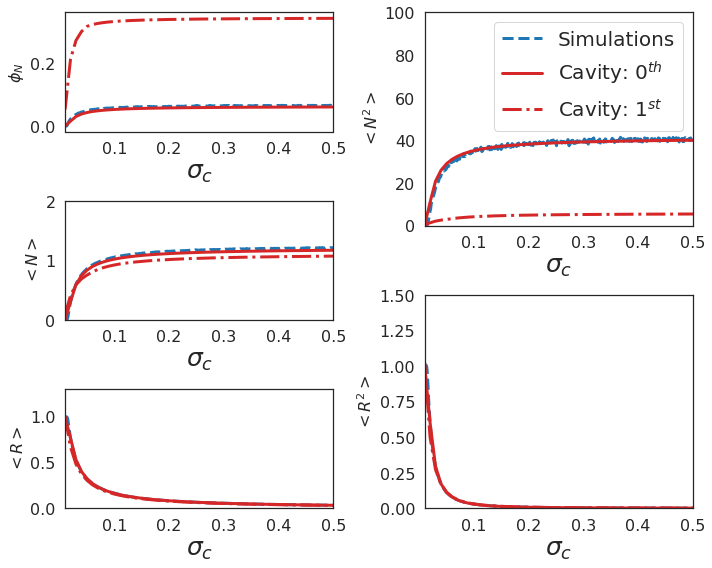

In [3]:
k=1.
S=100
file_name='Data/Community_uniform_null_linear_CVXOPT_log_sigc.csv'
data0=pd.read_csv(file_name)
data0=data0[data0['K']==k]

file_name='Data/Cavity_linear_uniform.csv'
data1=pd.read_csv(file_name)
data1=data1[data1['K']==k]

file_name='Data/Cavity_linear_1st_uniform.csv'
data2=pd.read_csv(file_name)
data2=data2[data2['K']==k]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(nrows=6, ncols=2)
fontsize=25
ax11 = fig.add_subplot(gs[:2, 0])
ax21 = fig.add_subplot(gs[2:4, 0])
ax31 = fig.add_subplot(gs[4:, 0])
ax12 = fig.add_subplot(gs[:3, 1])
ax22 = fig.add_subplot(gs[3:, 1])
axs=[ax11 ,ax21,ax31,ax12, ax22]
Y1=['phi_N', 'mean_N', 'mean_R', 'q_N', 'q_R']
Y2=['phiN', 'N', 'R', 'qN', 'qR']
Labels=[r'$\phi_N$', '$<N>$', '$<R>$',r'$<N^2>$',r'$<R^2>$']
for i in range(5):
    ax=axs[i]
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.plot(data0['epsilon'], data0[Y1[i]],label='Simulations',linestyle='--',linewidth=3,c=tableau20[0])
    ax.plot(data1['Mu']*2/S, data1[Y2[i]],linestyle='-',label='Cavity: $0^{th}$',linewidth=3,c=tableau20[6])
    ax.plot(data2['Mu']*2/S, data2[Y2[i]],linestyle='-.',label='Cavity: $1^{st}$',linewidth=3,c=tableau20[6])
    ax.set_xlabel(r'$\sigma_c$',fontsize=fontsize)
    ax.set_ylabel(Labels[i],fontsize=16)
    ax.set_xlim(0.01,0.5)
    if i==1: ax.set_ylim(0.,2)
    if i==2: ax.set_ylim(0.,1.3)
    if i==4: ax.set_ylim(0.,1.5)
    if i==3:
        ax.set_ylim(0.,100)
        ax.legend(fontsize=20,loc='upper right')
fig.tight_layout()
fig_name='Cavity_simulations_uniform.pdf'
fig.savefig(fig_name, dpi=300,bbox_inches='tight',transparent='True')

## Binomial

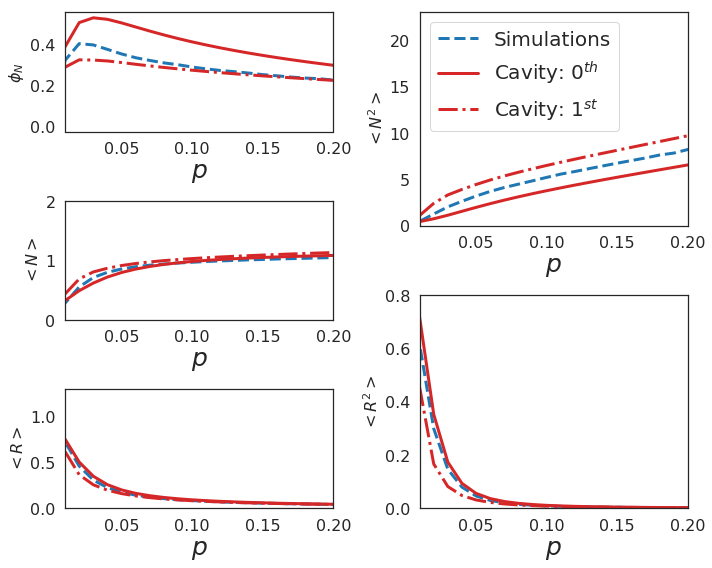

In [16]:
k=1.
S=100
file_name='Data/Community_binomial_null_linear_CVXOPT_log_sigc.csv'
data0=pd.read_csv(file_name)
data0=data0[data0['K']==k]

file_name='Data/Cavity_linear_binomial.csv'
data1=pd.read_csv(file_name)
data1=data1[data1['K']==k]

file_name='Data/Cavity_linear_1st_binomial.csv'
data2=pd.read_csv(file_name)
data2=data2[data2['K']==k]
data2=data2[data2['phiN']>0.1]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(nrows=6, ncols=2)
fontsize=25
ax11 = fig.add_subplot(gs[:2, 0])
ax21 = fig.add_subplot(gs[2:4, 0])
ax31 = fig.add_subplot(gs[4:, 0])
ax12 = fig.add_subplot(gs[:3, 1])
ax22 = fig.add_subplot(gs[3:, 1])
axs=[ax11 ,ax21,ax31,ax12, ax22]
Y1=['phi_N', 'mean_N', 'mean_R', 'q_N', 'q_R']
Y2=['phiN', 'N', 'R', 'qN', 'qR']
Labels=[r'$\phi_N$', '$<N>$', '$<R>$',r'$<N^2>$',r'$<R^2>$']
for i in range(5):
    ax=axs[i]
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.plot(data0['epsilon'], data0[Y1[i]],label='Simulations',linestyle='--',linewidth=3,c=tableau20[0])
    ax.plot(data1['Mu']/S, data1[Y2[i]],linestyle='-',label='Cavity: $0^{th}$',linewidth=3,c=tableau20[6])
    ax.plot(data2['Mu']/S, data2[Y2[i]],linestyle='-.',label='Cavity: $1^{st}$',linewidth=3,c=tableau20[6])
    ax.set_xlabel(r'$p$',fontsize=fontsize)
    ax.set_ylabel(Labels[i],fontsize=16)
    ax.set_xlim(0.01,0.2)
    if i==1: ax.set_ylim(0.,2)
    if i==2: ax.set_ylim(0.,1.3)
    if i==4: ax.set_ylim(0.,0.8)
    if i==3:
        ax.set_ylim(0.,23)
        ax.legend(fontsize=20,loc='upper left')
fig.tight_layout()
fig_name='Cavity_simulations_binomial.pdf'
fig.savefig(fig_name, dpi=300,bbox_inches='tight',transparent='True')

# Species Packing Bounds
## Quadratic

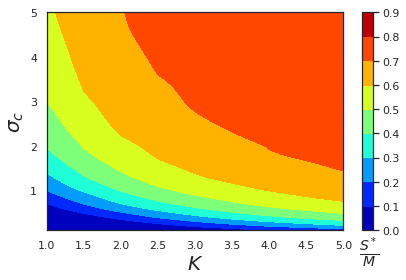

In [17]:
file_name='Data/Community_gaussian_null_quadratic_CVXOPT_linear_map.csv'
data=pd.read_csv(file_name)
X=data['K']
Y=data['epsilon']
Z=data['Survive']/100
Points=np.zeros((len(X),2))
Points[:,0]=X
Points[:,1]=Y
fontsize=20
methods = ['linear','cubic']
grid_x, grid_y = np.meshgrid(np.arange(1, 5.1, 0.5), np.arange(0.1, 5.1, 0.1))
zi = griddata((X, Y), Z, (grid_x, grid_y), method='cubic')
fig, ax = plt.subplots()
v = np.linspace(0, 1.0, 10, endpoint=False)
cs = ax.contourf(grid_x, grid_y, zi,levels=v,cmap='jet')
cbar = fig.colorbar(cs,ticks=v)
#ax.set_xscale("log") 
#ax.set_yscale("log") 
ax.set_ylabel(r'$\sigma_c$',fontsize=fontsize)
ax.set_xlabel(r'$K$',rotation=0,fontsize=fontsize)
cbar.set_label(r'$\frac{S^*}{M}$', labelpad=-30, y=-0.02, rotation=0,fontsize=fontsize)
fig.tight_layout()
fig.savefig('Ksigc_qu.pdf',dpi=300)

## Linear

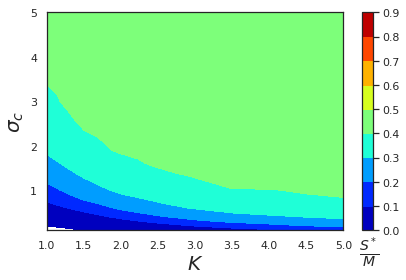

In [18]:
file_name='Data/Community_gaussian_null_linear_CVXOPT_linear_map.csv'
data=pd.read_csv(file_name)
X=data['K']
Y=data['epsilon']
Z=data['Survive']/100
Points=np.zeros((len(X),2))
Points[:,0]=X
Points[:,1]=Y
fontsize=20
methods = ['linear','cubic']
grid_x, grid_y = np.meshgrid(np.arange(1, 5.1, 0.5), np.arange(0.1,5.1, 0.1))
zi = griddata((X, Y), Z, (grid_x, grid_y), method='cubic')
fig, ax = plt.subplots()
v = np.linspace(0, 1.0, 10, endpoint=False)
cs = ax.contourf(grid_x, grid_y, zi,levels=v,cmap='jet')
cbar = fig.colorbar(cs,ticks=v)
#ax.set_xscale("log") 
#ax.set_yscale("log") 
ax.set_ylabel(r'$\sigma_c$',fontsize=fontsize)
ax.set_xlabel(r'$K$',rotation=0,fontsize=fontsize)
cbar.set_label(r'$\frac{S^*}{M}$', labelpad=-30, y=-0.02, rotation=0,fontsize=fontsize)
fig.tight_layout()
fig.savefig('Ksigc_li.pdf',dpi=300)